In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('8283.csv')

In [7]:
data

,Nama,Raport
0,ABDIEL AFDELINA,78
1,ADITYA PUTRA ARDANA,65
2,AHMAD AL FAUZI,73
3,AMZAR HAMIZAN,65
4,ANNISA YULIANTI AZRA,65
...,...,...
72,TENGKU ARIELLA KHANSA,65
73,TIFANY LUSIANA PUTRI,75
74,ULY CHAROLINA PANJAITAN,89
75,VERENYEN,76


In [8]:
X = data[['Raport']]

In [9]:
kmeans.inertia_

NameError: name 'kmeans' is not defined

In [10]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(kmeans.inertia_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [11]:
wcss

[3590.0779220779223,
 1172.5969387755101,
 407.78855553049107,
 269.0553412105136,
 155.9784181335905,
 80.63547008547008]

Text(0, 0.5, 'WCSS')

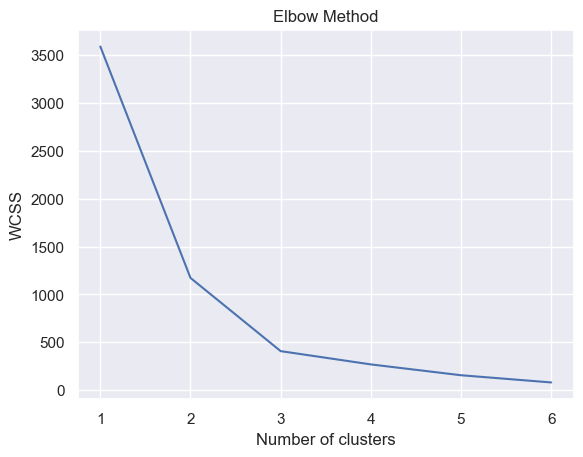

In [13]:
number_cluster = range(1,7)
plt.plot(number_cluster, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
data['cluster'] = y_kmeans

In [16]:
cluster_means = data.groupby('cluster')['Raport'].mean().sort_values()

In [21]:
data['keterangan'] = cluster_labels = { 
    cluster_means.index[0]: 'Kurang Paham', 
    cluster_means.index[1]: 'Cukup Paham', 
    cluster_means.index[2]: 'Sangat Paham'
}

In [23]:
data['keterangan'] = data['cluster'].map(cluster_labels)

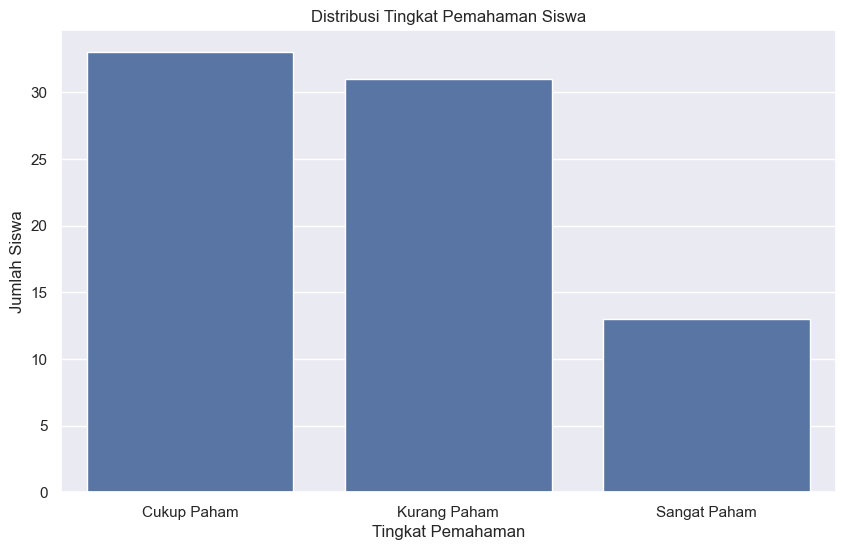

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='keterangan', data=data)
plt.title('Distribusi Tingkat Pemahaman Siswa')
plt.xlabel('Tingkat Pemahaman')
plt.ylabel('Jumlah Siswa')
plt.show()